#Imports

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
!pip install textstat
!pip install empath

import numpy as np
import pandas as pd
import textstat
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud
from nltk.stem.porter import *
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import empath

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 10.9 MB/s 
     |████████████████████████████████| 2.0 MB 46.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.7 MB/s 
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57821 sha256=3085bfab638c19c83e4410a2786440a4e4e0918aea509cbcbdad53ae325f9d1f
  Stored in directory: /root/.cache/pip/wheels/2b/78/a8/37d4505eeae79807f4b5565a193f7cfcee892137ad37591029
Successfully built empath


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sid.polarity_scores("I love him so much") #Sentiment analysis

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

#Task 1 : input reviews and output scores in a database


>Import dataset 



In [ ]:
def aggregate_review(neg_review : str,pos_review :str) -> str:
  if neg_review == "No Negative":
    neg_review = ""
  if pos_review == "No Positive":
    pos_review = ""
  agg_review = f"{neg_review} {pos_review}"
  return agg_review

sid = SentimentIntensityAnalyzer()

def vader_score(review: str) -> str:
  polarity = sid.polarity_scores(review) #Sentiment analysis
  neg,neu,pos,compound = polarity['neg'],polarity['neu'],polarity['pos'],polarity['compound']
  return neg,neu,pos,compound

In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: Hotel_Reviews.csv       


In [ ]:
dataset_path = "/content/Hotel_Reviews.csv"

In [ ]:
reviews = pd.read_csv(dataset_path, sep=',')
reviews.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [ ]:
reviews.axes

[RangeIndex(start=0, stop=515738, step=1),
 Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
        'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
        'Negative_Review', 'Review_Total_Negative_Word_Counts',
        'Total_Number_of_Reviews', 'Positive_Review',
        'Review_Total_Positive_Word_Counts',
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
        'days_since_review', 'lat', 'lng'],
       dtype='object')]

In [ ]:
reviews_vader = reviews.drop(columns = ['Additional_Number_of_Scoring', 'Review_Date',
        'Reviewer_Nationality','Average_Score',
        'Review_Total_Negative_Word_Counts',
        'Total_Number_of_Reviews',
        'Review_Total_Positive_Word_Counts',
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
        'days_since_review', 'lat', 'lng'])

In [ ]:
reviews_vader.head(3)

,Hotel_Address,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1


In [ ]:
reviews_vader['Total_Review'] = reviews_vader.apply(lambda x : aggregate_review(x['Negative_Review'],x['Positive_Review']),axis =1)

In [ ]:
reviews_vader['Negative_Score']= reviews_vader['Total_Review'].map(lambda x: (vader_score(x)[0]))
reviews_vader['Neutral_Score']= reviews_vader['Total_Review'].map(lambda x: (vader_score(x)[1]))
reviews_vader['Positive_Score']=reviews_vader['Total_Review'].map(lambda x: (vader_score(x)[2]))
reviews_vader['Compound_Score'] =reviews_vader['Total_Review'].map(lambda x: (vader_score(x)[3]))

In [ ]:
reviews_vader.head(3)

,Hotel_Address,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Total_Review,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,I am so angry that i made this post available...,0.083,0.859,0.058,-0.8589
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5,No real complaints the hotel was great great...,0.058,0.757,0.186,0.9494
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,Rooms are nice but for elderly a bit difficul...,0.111,0.671,0.218,0.8402


#Task 2 : Compute Correlation


In [ ]:
reviews_vader.axes

[RangeIndex(start=0, stop=515738, step=1),
 Index(['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review',
        'Reviewer_Score', 'Total_Review', 'Negative_Score', 'Neutral_Score',
        'Positive_Score', 'Compound_Score'],
       dtype='object')]

In [ ]:
reviews_correlation = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review',
         'Total_Review'])

In [ ]:
reviews_correlation.head(10)

,Reviewer_Score,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,2.9,0.083,0.859,0.058,-0.8589
1,7.5,0.058,0.757,0.186,0.9494
2,7.1,0.111,0.671,0.218,0.8402
3,3.8,0.099,0.754,0.147,0.9355
4,6.7,0.058,0.861,0.081,0.5263
5,6.7,0.057,0.595,0.348,0.9287
6,4.6,0.000,0.744,0.256,0.9337
7,10.0,0.000,0.557,0.443,0.9491
8,6.5,0.130,0.814,0.056,-0.3856
9,7.9,0.021,0.847,0.132,0.8074


In [ ]:
reviews_correlation.corr(method = 'pearson')

,Reviewer_Score,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
Reviewer_Score,1.000000,-0.286975,-0.276065,0.408533,0.454674
Negative_Score,-0.286975,1.000000,-0.166952,-0.340340,-0.583777
Neutral_Score,-0.276065,-0.166952,1.000000,-0.861613,-0.374796
Positive_Score,0.408533,-0.340340,-0.861613,1.000000,0.655223
Compound_Score,0.454674,-0.583777,-0.374796,0.655223,1.000000


#Task 3 and 4 : Token count and correlation

In [ ]:
reviews_vader.head(3)

,Hotel_Address,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Total_Review,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,I am so angry that i made this post available...,0.083,0.859,0.058,-0.8589
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5,No real complaints the hotel was great great...,0.058,0.757,0.186,0.9494
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,Rooms are nice but for elderly a bit difficul...,0.111,0.671,0.218,0.8402


In [ ]:
reviews_tokencnt = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])

In [ ]:
reviews_tokencnt.head(3)

,Reviewer_Score,Total_Review,Compound_Score
0,2.9,I am so angry that i made this post available...,-0.8589
1,7.5,No real complaints the hotel was great great...,0.9494
2,7.1,Rooms are nice but for elderly a bit difficul...,0.8402


In [ ]:
reviews_tokencnt['Token_Count'] = reviews_tokencnt['Total_Review'].map(lambda x: len(word_tokenize(x)))

In [ ]:
reviews_tokencnt = reviews_tokencnt.drop(columns=["Total_Review"])
reviews_tokencnt.head(3)

,Reviewer_Score,Compound_Score,Token_Count
0,2.9,-0.8589,404
1,7.5,0.9494,103
2,7.1,0.8402,59


In [ ]:
reviews_tokencnt.corr(method = 'pearson')

,Reviewer_Score,Compound_Score,Token_Count
Reviewer_Score,1.000000,0.454674,-0.167889
Compound_Score,0.454674,1.000000,0.163071
Token_Count,-0.167889,0.163071,1.000000


#Task 5 : Wordnet, uncommon wording and negative reviews 

In [ ]:
def wnet_check(data : list or str):
  score = 0
  if isinstance(data,str):
    data = word_tokenize(data)
  for words in data:
    score += int(wn.synsets(words)==[])
  return score

In [ ]:
reviews_wnet = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review','Neutral_Score'])
reviews_wnet.head(3)

In [ ]:
reviews_wnet['Misspelled_tokens'] = reviews_wnet['Total_Review'].map(wnet_check)
reviews_wnet = reviews_wnet.drop(columns = ['Total_Review'])
reviews_wnet.head(3)

In [ ]:
reviews_wnet.corr(method = 'pearson')

,Reviewer_Score,Negative_Score,Positive_Score,Compound_Score,Misspelled_tokens,Short_sentences
Reviewer_Score,1.000000,-0.286975,0.408533,0.454674,-0.149182,-0.022382
Negative_Score,-0.286975,1.000000,-0.340340,-0.583777,-0.046445,0.005418
Positive_Score,0.408533,-0.340340,1.000000,0.655223,-0.211345,-0.027002
Compound_Score,0.454674,-0.583777,0.655223,1.000000,0.143466,0.029507
Misspelled_tokens,-0.149182,-0.046445,-0.211345,0.143466,1.000000,0.169558
Short_sentences,-0.022382,0.005418,-0.027002,0.029507,0.169558,1.000000


#Task 5' : Wordnet, uncommon wording and negative reviews, using scaled misspelling score

In [ ]:
def wnet_check_2(data : list or str):
  score = 0
  if isinstance(data,str):
    data = word_tokenize(data)
  l = len(data)
  if l == 0:
    return 0
  for words in data:
    score += int(wn.synsets(words)==[])
  return score/l

def count_irregular_sentences(data: str):
  score = 0
  word_cnt = 0
  for char in data:
    if char.lower() != char:
      if word_cnt<=4 or word_cnt >30:
        score+=1
      word_cnt = 0
    elif char == " ":
      word_cnt+=1
  return score

In [ ]:
reviews_wnet_2 = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review','Neutral_Score'])
reviews_wnet_2['Misspelled_tokens'] = reviews_wnet_2['Total_Review'].map(wnet_check_2)
reviews_wnet_2['Irregular_sentences'] = reviews_wnet_2['Total_Review'].map(count_irregular_sentences)
reviews_wnet_2 = reviews_wnet_2.drop(columns = ['Total_Review'])
reviews_wnet_2.corr(method = 'pearson')

,Reviewer_Score,Negative_Score,Positive_Score,Compound_Score,Misspelled_tokens,Irregular_sentences
Reviewer_Score,1.000000,-0.286975,0.408533,0.454674,0.009436,-0.024200
Negative_Score,-0.286975,1.000000,-0.340340,-0.583777,-0.153395,0.005639
Positive_Score,0.408533,-0.340340,1.000000,0.655223,-0.250935,-0.028834
Compound_Score,0.454674,-0.583777,0.655223,1.000000,0.023582,0.024169
Misspelled_tokens,0.009436,-0.153395,-0.250935,0.023582,1.000000,0.027273
Irregular_sentences,-0.024200,0.005639,-0.028834,0.024169,0.027273,1.000000


#Task 6 : Incoherent reviews

In [ ]:
reviews_incoherent = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review','Total_Review' ,'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])
reviews_incoherent.head(3)

,Reviewer_Score,Compound_Score
0,2.9,-0.8589
1,7.5,0.9494
2,7.1,0.8402


In [ ]:
reviews_incoherent = reviews_incoherent[((reviews_incoherent['Reviewer_Score']>5) & (reviews_incoherent['Compound_Score']<-0.2)) |((reviews_incoherent['Reviewer_Score']<5) & (reviews_incoherent['Compound_Score']>0.2))]
reviews_incoherent.size

98046

In [ ]:
reviews_incoherent.to_csv("/content/incoherent_reviews.csv")

#Task 6' : Incoherent reviews using negative sentiment


In [ ]:
reviews_incoherent = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review','Total_Review' ,'Positive_Review','Compound_Score','Positive_Score','Neutral_Score'])
reviews_incoherent.head(3)

,Reviewer_Score,Negative_Score
0,2.9,0.083
1,7.5,0.058
2,7.1,0.111


In [ ]:
reviews_incoherent = reviews_incoherent[((reviews_incoherent['Reviewer_Score']>5) & (reviews_incoherent['Negative_Score']>0.15)) |((reviews_incoherent['Reviewer_Score']<5) & (reviews_incoherent['Negative_Score']<0.15))]
reviews_incoherent.size

133048

In [ ]:
reviews_incoherent.to_csv("/content/incoherent_reviews.csv")

#Task 7 : Data representation

In [ ]:
reviews_incoherent = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review' ,'Positive_Review','Compound_Score','Positive_Score','Neutral_Score'])
reviews_incoherent = reviews_incoherent[((reviews_incoherent['Reviewer_Score']>5) & (reviews_incoherent['Negative_Score']>0.15)) |((reviews_incoherent['Reviewer_Score']<5) & (reviews_incoherent['Negative_Score']<0.15))]

(-0.5, 399.5, 199.5, -0.5)

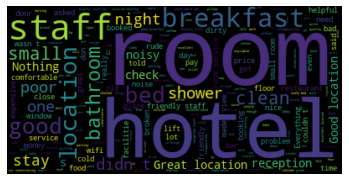

In [ ]:
text = ""
for _, row in reviews_incoherent.iterrows():
  text+=row['Total_Review']
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Task 8 : Empath Categorization

In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
reviews_empath = reviews_incoherent
reviews_empath.head(3)

,Reviewer_Score,Total_Review,Negative_Score
0,2.9,I am so angry that i made this post available...,0.083
3,3.8,My room was dirty and I was afraid to walk ba...,0.099
6,4.6,Cleaner did not change our sheet and duvet ev...,0.000


In [ ]:
def output_empath_short(text : str):
  short_categories = {}
  categories = lexicon.analyze(text,normalize = True)
  for cat in categories : 
    if categories[cat] >0:
      short_categories[cat] = categories[cat]
  return short_categories

def output_empath(text : str):
  return lexicon.analyze(text,normalize = True)

def summarize_empath(dict_list : list):
  dict1 = {}
  s=0
  for cat in dict_list[0]:
    s=0
    for categories in dict_list:
        s+= categories[cat]
    dict1[cat] = s
  return dict1

In [ ]:
output_empath_short("event at the office")

{'office': 0.25,
 'occupation': 0.25,
 'furniture': 0.25,
 'college': 0.25,
 'business': 0.25,
 'celebration': 0.25,
 'meeting': 0.5,
 'work': 0.25,
 'white_collar_job': 0.25,
 'party': 0.25}

In [ ]:
reviews_empath["Empath"] = reviews_empath["Total_Review"].map(output_empath)

In [ ]:
col = reviews_empath["Empath"].tolist()
summary = summarize_empath(col)

In [ ]:
sorted(summary.items(), key=lambda item: item[1],reverse = True)[:10]

#Task 9 : Topic modelling


In [ ]:
stops = set(stopwords.words('english'))
stemmer = PorterStemmer()

def token_cleaner(tokens : list) -> list:
  #tokens must be a list of lowercase tokenized words
  tokens_cleaned = []

  for token in tokens:
    if token not in stops:
      tokens_cleaned.append(token)
  

  for i,word in enumerate(tokens_cleaned):
    tokens_cleaned[i] = stemmer.stem(word)
  return tokens_cleaned

In [ ]:
corpus = []
for _, row in reviews_vader.iterrows():
  review = row['Total_Review']
  review = review.lower()
  review = word_tokenize(review)
  review = token_cleaner(review)
  corpus.append(review)

In [ ]:
corpus_dict = Dictionary(corpus)
corpus = [corpus_dict.doc2bow(text) for text in corpus]

In [ ]:
lda = LdaModel(corpus,id2word = corpus_dict,num_topics=10)

In [ ]:
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.097*"staff" + 0.084*"room" + 0.070*"locat" + 0.050*"friendli" + 0.050*"good" + 0.046*"breakfast" + 0.044*"clean" + 0.042*"help" + 0.038*"comfort" + 0.037*"bed"')
(1, '0.054*"coffe" + 0.044*"room" + 0.036*"star" + 0.034*"tea" + 0.027*"4" + 0.024*"free" + 0.021*"water" + 0.020*"5" + 0.018*"facil" + 0.014*"bottl"')
(2, '0.039*"room" + 0.033*"book" + 0.029*"hotel" + 0.029*"park" + 0.027*"price" + 0.023*"money" + 0.023*"pay" + 0.023*"charg" + 0.022*"breakfast" + 0.020*"wifi"')
(3, '0.033*"check" + 0.027*"staff" + 0.020*"us" + 0.019*"room" + 0.019*"recept" + 0.016*"ask" + 0.015*"time" + 0.014*"day" + 0.012*"arriv" + 0.011*"desk"')
(4, '0.088*"room" + 0.032*"bed" + 0.021*"bathroom" + 0.018*"shower" + 0.015*"small" + 0.014*"locat" + 0.012*"work" + 0.012*"air" + 0.012*"window" + 0.011*"floor"')
(5, '0.053*"hotel" + 0.034*"pool" + 0.032*"room" + 0.029*"old" + 0.028*"nice" + 0.024*"locat" + 0.020*"area" + 0.019*"spa" + 0.018*"design" + 0.017*"tram"')
(6, '0.098*"breakfast" + 0.036*"good" +

In [ ]:
def topic_cloud(topics,n):
  topic_words = dict(topics[n][1])
  wc = WordCloud(max_words=20).generate_from_frequencies(topic_words, max_font_size=300)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")

topics = lda.show_topics(num_words = 20,formatted = False)

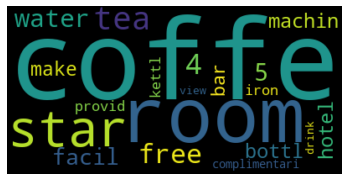

In [ ]:
topic_cloud(topics,1)

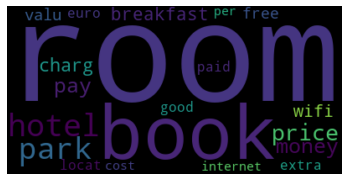

In [ ]:
topic_cloud(topics,2)

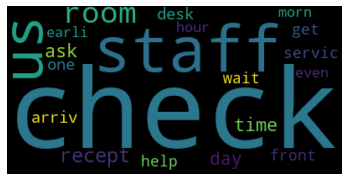

In [ ]:
topic_cloud(topics,3)

# Task 10 : Readability index of reviews

In [ ]:
# Incoherent reviews
reviews_incoherent = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review' ,'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])
reviews_incoherent = reviews_incoherent[((reviews_incoherent['Reviewer_Score']>5) & (reviews_incoherent['Compound_Score']<-0.05)) |((reviews_incoherent['Reviewer_Score']<5) & (reviews_incoherent['Compound_Score']>0.05))]

reviews_incoherent['readability_index'] = reviews_incoherent['Total_Review'].apply(lambda x: textstat.automated_readability_index(x))

avg_readability_index = np.mean(reviews_incoherent['readability_index'])
median_readability_index = np.median(reviews_incoherent['readability_index'])
max_readability_index = np.max(reviews_incoherent['readability_index'])
min_readability_index = np.min(reviews_incoherent['readability_index'])
std_readability_index = np.std(reviews_incoherent['readability_index'])

print(f'Readability index mean: {avg_readability_index}\n'
      f'Readability index median: {median_readability_index}\n'
      f'Readability index standard deviation: {std_readability_index}\n'
      f'Readability index maximum: {max_readability_index}\n'
      f'Readability index minimum: {min_readability_index}')

In [ ]:
# Coherent reviews
reviews_coherent = reviews_vader.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review' ,'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])
reviews_coherent = reviews_coherent[((reviews_coherent['Reviewer_Score']>=5) & (reviews_coherent['Compound_Score']>=-0.05)) |((reviews_coherent['Reviewer_Score']<=5) & (reviews_coherent['Compound_Score']<=0.05))]

reviews_coherent['readability_index'] = reviews_coherent['Total_Review'].apply(lambda x: textstat.automated_readability_index(x))

avg_readability_index = np.mean(reviews_coherent['readability_index'])
median_readability_index = np.median(reviews_coherent['readability_index'])
max_readability_index = np.max(reviews_coherent['readability_index'])
min_readability_index = np.min(reviews_coherent['readability_index'])
std_readability_index = np.std(reviews_coherent['readability_index'])

print(f'Readability index mean: {avg_readability_index}\n'
      f'Readability index median: {median_readability_index}\n'
      f'Readability index standard deviation: {std_readability_index}\n'
      f'Readability index maximum: {max_readability_index}\n'
      f'Readability index minimum: {min_readability_index}')

In [ ]:
from textstat import char_count

def automated_readability_index(text):
    words = len(word_tokenize(text))
    if words == 0:
        return 0
    characters = char_count(text)
    sentences = calculate_sentences(text)
    return 4.71 * (characters / words) + 0.5 * (words / sentences) - 21.43

def calculate_sentences(text):
    if len(text) == 0:
        return 0
    sentence_count = 1
    tokens = word_tokenize(text)
    for token in tokens[1:]:
        if token[0].isupper() and token[1:].islower():
            sentence_count += 1
    return sentence_count

In [ ]:
reviews_incoherent['automated_readability_index'] = reviews_incoherent['Total_Review'].apply(lambda x: automated_readability_index(x))
reviews_coherent['automated_readability_index'] = reviews_coherent['Total_Review'].apply(lambda x: automated_readability_index(x))

In [ ]:
avg_readability_index = np.mean(reviews_incoherent['automated_readability_index'])
median_readability_index = np.median(reviews_incoherent['automated_readability_index'])
max_readability_index = np.max(reviews_incoherent['automated_readability_index'])
min_readability_index = np.min(reviews_incoherent['automated_readability_index'])
std_readability_index = np.std(reviews_incoherent['automated_readability_index'])
print(f'Readability index mean: {avg_readability_index}\n'
      f'Readability index median: {median_readability_index}\n'
      f'Readability index standard deviation: {std_readability_index}\n'
      f'Readability index maximum: {max_readability_index}\n'
      f'Readability index minimum: {min_readability_index}')

In [ ]:
avg_readability_index = np.mean(reviews_coherent['automated_readability_index'])
median_readability_index = np.median(reviews_coherent['automated_readability_index'])
max_readability_index = np.max(reviews_coherent['automated_readability_index'])
min_readability_index = np.min(reviews_coherent['automated_readability_index'])
std_readability_index = np.std(reviews_coherent['automated_readability_index'])
print(f'Readability index mean: {avg_readability_index}\n'
      f'Readability index median: {median_readability_index}\n'
      f'Readability index standard deviation: {std_readability_index}\n'
      f'Readability index maximum: {max_readability_index}\n'
      f'Readability index minimum: {min_readability_index}')

#Task 1: with Textblob

In [ ]:
<from textblob import TextBlob

blob = TextBlob(text)

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
  
#Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

def aggregate_review(neg_review : str,pos_review :str) -> str:
  if neg_review == "No Negative":
    neg_review = ""
  if pos_review == "No Positive":
    pos_review = ""
  agg_review = f"{neg_review} {pos_review}"
  return agg_review


def blob_score(review: str) -> str:
  polarity = getPolarity(review) #Sentiment analysis
  return polarity



dataset_path = "Hotel_Reviews.csv"

reviews = pd.read_csv(dataset_path, sep=',')
reviews.head(3)
reviews.axes

reviews_blob = reviews.drop(columns = ['Additional_Number_of_Scoring', 'Review_Date',
        'Reviewer_Nationality','Average_Score',
        'Review_Total_Negative_Word_Counts',
        'Total_Number_of_Reviews',
        'Review_Total_Positive_Word_Counts',
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
        'days_since_review', 'lat', 'lng'])

reviews_blob['Total_Review'] = reviews_blob.apply(lambda x : aggregate_review(x['Negative_Review'],x['Positive_Review']),axis =1)

print(reviews_blob.head(1))



reviews_blob['blob_score']= reviews_blob['Total_Review'].map(lambda x: blob_score(x))

reviews_blob_cut = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review',
         'Total_Review', 'Reviewer_Score'])

reviews_blob['Negative_Score'] = reviews_blob_cut[reviews_blob_cut['blob_score'] < -0.1]
reviews_blob['Neutral_Score'] = reviews_blob_cut[(reviews_blob_cut['blob_score'] < 0.1) & (reviews_blob['blob_score'] > -0.1)]
reviews_blob['Positive_Score'] = reviews_blob_cut[reviews_blob_cut['blob_score'] > 0.1]



print(reviews_blob.head(10))

#Task 2: with Textblob

In [ ]:
reviews_correlation = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review',
         'Total_Review'])

reviews_correlation.head(10)

done_reviews_correlation = reviews_correlation.corr(method = 'pearson')

done_reviews_correlation.head(10)

#Task 3 and 4: with Textblob

In [ ]:
reviews_blob.head(3)
reviews_tokencnt = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])
reviews_tokencnt.head(3)
reviews_tokencnt['Token_Count'] = reviews_tokencnt['Total_Review'].map(lambda x: len(word_tokenize(x)))

reviews_tokencnt = reviews_tokencnt.drop(columns=["Total_Review"])
reviews_tokencnt.head(3)
done_reviews_tokencnt = reviews_tokencnt.corr(method = 'pearson')

done_reviews_tokencnt.head(3)

# Task 5: with Textblob

In [ ]:
def wnet_check(data : list or str):
  score = 0
  if isinstance(data,str):
    data = word_tokenize(data)
  for words in data:
    score += int(wn.synsets(words)==[])
  return score

reviews_wnet = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review','Neutral_Score'])
reviews_wnet.head(3)

reviews_wnet['Misspelled_tokens'] = reviews_wnet['Total_Review'].map(wnet_check)

reviews_wnet = reviews_wnet.drop(columns = ['Total_Review'])

reviews_wnet.head(3)

done_reviews_wnet = reviews_wnet.corr(method = 'pearson')

done_reviews_wnet.head(3)

#Task 5': with Textblob

In [ ]:
def wnet_check_2(data : list or str):
  score = 0
  if isinstance(data,str):
    data = word_tokenize(data)
  l = len(data)
  if l == 0:
    return 0
  for words in data:
    score += int(wn.synsets(words)==[])
  return score/l

reviews_wnet_2 = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review','Neutral_Score'])
reviews_wnet_2['Misspelled_tokens'] = reviews_wnet_2['Total_Review'].map(wnet_check_2)
reviews_wnet_2 = reviews_wnet_2.drop(columns = ['Total_Review'])

done_reviews_wnet_2 = reviews_wnet_2.corr(method = 'pearson')
done_reviews_wnet_2.head(3)

#Task 6: with Textblob

In [ ]:
reviews_incoherent = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review','Total_Review' ,'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])
reviews_incoherent.head(3)

reviews_incoherent = reviews_incoherent[((reviews_incoherent['Reviewer_Score']>5) & (reviews_incoherent['blob_score']<-0.1)) |((reviews_incoherent['Reviewer_Score']<5) & (reviews_incoherent['blob_score']>0.1))]
reviews_incoherent.size
reviews_incoherent.head(3)
reviews_incoherent.to_csv("incoherent_reviews.csv")

# Task 7: with Textblob

In [ ]:
reviews_incoherent = reviews_blob.drop(columns=['Hotel_Address', 'Hotel_Name', 'Negative_Review' ,'Positive_Review','Negative_Score','Positive_Score','Neutral_Score'])
reviews_incoherent = reviews_incoherent[((reviews_incoherent['Reviewer_Score']>5) & (reviews_incoherent['blob_score']<-0.1)) |((reviews_incoherent['Reviewer_Score']<5) & (reviews_incoherent['blob_score']>0.1))]

text = ""
for _, row in reviews_incoherent.iterrows():
  text+=row['Total_Review']
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Task 8: with Textblob

In [ ]:
from empath import Empath
lexicon = Empath()

reviews_empath = reviews_incoherent
reviews_empath.head(3)

def output_empath_short(text : str):
  short_categories = {}
  categories = lexicon.analyze(text,normalize = True)
  for cat in categories : 
    if categories[cat] >0:
      short_categories[cat] = categories[cat]
  return short_categories

def output_empath(text : str):
  return lexicon.analyze(text,normalize = True)

def summarize_empath(dict_list : list):
  dict1 = {}
  s=0
  for cat in dict_list[0]:
    s=0
    for categories in dict_list:
        s+= categories[cat]
    dict1[cat] = s
  return dict1

output_empath_short("event at the office")
reviews_empath["Empath"] = reviews_empath["Total_Review"].map(output_empath)

summary = summarize_empath(reviews_empath["Empath"].tolist())

sorted(summary.items(), key=lambda item: item[1],reverse = True)[:10]

# Task 9: with Textblob

In [ ]:
stops = set(stopwords.words('english'))
stemmer = PorterStemmer()

def token_cleaner(tokens : list) -> list:
  #tokens must be a list of lowercase tokenized words
  tokens_cleaned = []

  for token in tokens:
    if token not in stops:
      tokens_cleaned.append(token)
  

  for i,word in enumerate(tokens_cleaned):
    tokens_cleaned[i] = stemmer.stem(word)
  return tokens_cleaned

corpus = []
for _, row in reviews_blob.iterrows():
  review = row['Total_Review']
  review = review.lower()
  review = word_tokenize(review)
  review = token_cleaner(review)
  corpus.append(review)

corpus_dict = Dictionary(corpus)
corpus = [corpus_dict.doc2bow(text) for text in corpus]

lda = LdaModel(corpus,id2word = corpus_dict,num_topics=10)

topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)